# P03: Point Processes

## Problem 1: Mean and variance of Gaussian random variable

Let us simulate the experiment of measuring a Gaussian random variable with $\mu=0$ and standard deviation $\sigma=1$. Each experiment is a draw from a standard normal.

(i) Simulate 10 repetitions of this experiment by drawing $n_{\mathrm{samp}}=10$ samples from this distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Paramters
mu = 0
sigma = 1
n_samp = 10
n_reps = 10

# Simulating 10 repetitions of drawing 10 samples
samples = np.random.normal(mu, sigma, (n_reps, n_samp))

print(samples)

[[ 1.3226733  -1.67122114 -0.02536233 -1.71078811  2.06464465  1.21952358
   0.26476907 -0.50762582 -0.62718095 -0.06533379]
 [ 0.11843404  1.33585754 -0.02656945 -0.4879656  -1.0477861   0.85435222
   1.08299435 -1.31916684  0.64709104  0.3726343 ]
 [ 0.26630042 -0.20867858 -0.04135476  2.13229197  0.95523305  1.36886405
   0.76755925  0.34462844 -0.27425318 -1.12831303]
 [-0.89619968  0.41842924 -0.13685609 -2.39010217  0.01756891  1.58828751
  -1.70085616 -1.27155369 -0.27453141 -1.17013855]
 [ 1.64791851  1.33121917 -0.67035993  0.31071884 -1.50378589  0.12184073
   1.8486398  -0.66611313  2.5205259   0.35632667]
 [ 1.11013716 -0.10971268  0.57045441 -0.55320733 -1.38901938 -0.45886627
  -0.25818006  1.13663857 -1.08947484  2.18815434]
 [ 0.49957683  0.03398274 -0.02281742  0.23395285 -0.51182332 -1.00434572
  -0.97679385  0.59220378  0.13465858  0.78083667]
 [-0.11989113  0.3462032  -0.08027908 -0.80251319  0.24296415 -0.37204124
  -0.01410227  1.74318493  0.64071913  1.05333019]


(ii) Use `numpy` routines to estimate the mean and the variance of the samples. For the variance, use the trivial but biased estimator as well as the unbiased one.

In [4]:
# Calculating the mean and the variance
sample_means = np.mean(samples, axis=1)
variances_biased = np.var(samples, axis=1) # biased variance
variance_unbiased = np.var(samples, axis=1, ddof=1) # unbiased variance

print(sample_means)

[ 0.02640985  0.15298755  0.41822776 -0.58159521  0.52969307  0.11469239
 -0.02405689  0.26375747  0.09872149  0.33604694]


## Problem 2: Distribution of sample mean

Write a function that repeats problem 1 $n$ times.

(i) Using these samples, investigate the distribution of the sample mean. How does it compare to your expectations? How do your conclusions change if you increase the sample size to $n_{\mathrm{samp}}=100$?



In [5]:
def simulate_samples(n_reps, n_samp):
    # Parameters
    mu = 0
    sigma = 1
    
    # Simulating samples
    samples = np.random.normal(mu, sigma, (n_reps, n_samp))
    
    # Calculating means and variances
    sample_means = np.mean(samples, axis=1)
    variances_biased = np.var(samples, axis=1)  # Biased variance
    variances_unbiased = np.var(samples, axis=1, ddof=1)  # Unbiased variance
    
    return sample_means, variances_biased, variances_unbiased

(ii) Using these samples, investigate the bias of the variance estimators. How does it compare to your expectations? How do your conclusions change if you increase the sample size to $n_{\mathrm{samp}}=100$?

In [6]:
def analyze_distribution_and_bias(n_reps=1000, n_samp_list=[10, 100]):
    for n_samp in n_samp_list:
        sample_means, variances_biased, variances_unbiased = simulate_samples(n_reps, n_samp)
        
        # (i) Investigate the distribution of the sample mean
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='g')
        plt.title(f'Distribution of Sample Mean (n_samp={n_samp})')
        plt.xlabel('Sample Mean')
        plt.ylabel('Density')
        
        # Overlaying the expected normal distribution
        x = np.linspace(-4, 4, 100)
        plt.plot(x, (1/(np.sqrt(2 * np.pi))) * np.exp(-x**2 / 2), color='red', lw=2)
        
        # (ii) Investigate bias of variance estimators
        plt.subplot(1, 2, 2)
        plt.hist(variances_biased, bins=30, alpha=0.6, color='b', label='Biased Variance')
        plt.hist(variances_unbiased, bins=30, alpha=0.6, color='orange', label='Unbiased Variance')
        plt.title(f'Variance Estimators (n_samp={n_samp})')
        plt.xlabel('Variance Value')
        plt.ylabel('Frequency')
        plt.axvline(x=sigma**2, color='k', linestyle='dashed', linewidth=2)  # True variance line
        plt.legend()
        
        plt.tight_layout()
        plt.show()


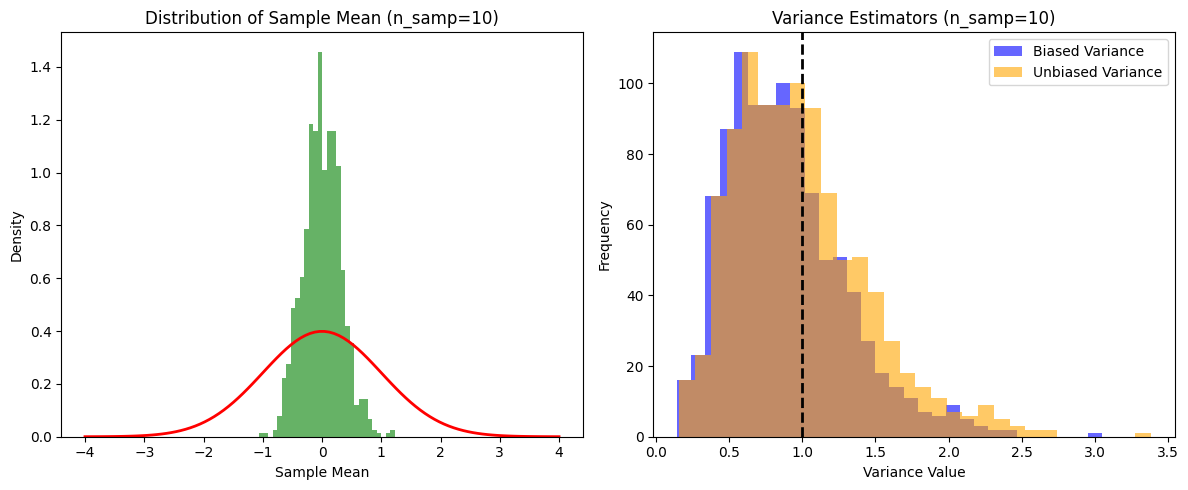

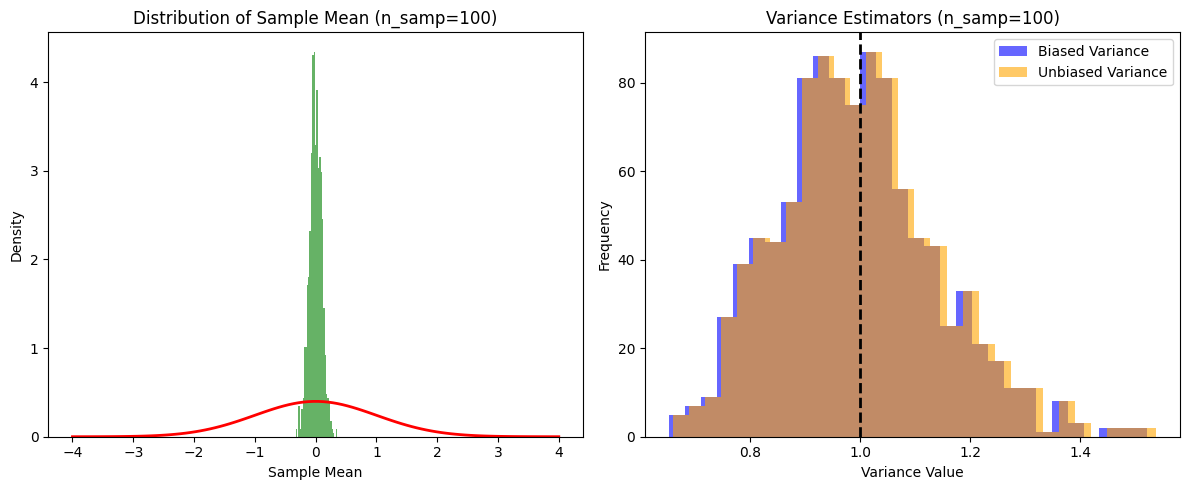

In [7]:
# Running the analysis for different sample sizes
analyze_distribution_and_bias(n_reps=1000)

## Problem 3: Analyzing samples

Load `sample1.out` from the `data` directory into your notebook. Inspect the distribution of the sample by plotting a histogram. 

(i) Write a class that is able to estimate mean and variance as well as error on the mean and bias of the variance. Make the choice of the variance estimator an argument of the class' `__init__` function.

(ii) Use your class to estimate mean and variance of `sample1.out`. In addition, also estimate the median and plot them on top of your histogram.

(iii) Now also estimate the mean and variance of the remaining samples in the `data` directory. Are the samples consistent with being drawn from the same underlying distribution? If yes, investigate the distribution of the sample means and compare to your expectations.

## Problem 4: The Poisson distribution

Let us assume we have a process in which the probability of a given event, $p$, is small but we perform a large number of trials $N$. We further assume that the so-called rate of this process (or mean number of ocurring events), $\lambda=Np$, is finite and constant. Then the probability of $k$ events occurring follows a Poisson distribution given by $$P(k|\lambda)=\frac{\lambda^k e^{-\lambda}}{k!}.$$ So the Poisson distribution describes the distributions of events, where each single one is rare but we perform a large number of trials in order to keep $\lambda$ constant. An example for this is the number of photons reaching a telescope.

One of the earliest application of Poisson processes was the probability of Prussian soldiers being kicked to death by horses. This problem was analyzed by Ladislaus Bortkiewicz in 1898. Analyzing 10 Prussian corps for 20 years he collected the following data:

| Number of deaths | Number of groups |
|:---| :--- |
| 0 | 109 |
| 1 | 65 |
| 2 | 22 |
| 3 | 3 |
| 4 | 1 |

(i) Plot the probability distribution of these data.

(ii) Compare to the theoretical prediction using Poisson statistics.